In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd
import re
import os
import sys
import csv

sys.path.append("..")
import analysis_package.maxlab_analysis as mla

import analysis_package.burst as burst
from analysis_package.burst import Burst
import csv
plt.switch_backend("Qt5Agg")

In [2]:
def stacked_bar_plot(pre, train, post, title):
    pre_proportion = np.sum(pre)/len(pre)
    train_proportion = np.sum(train)/len(train)
    post_proportion = np.sum(post)/len(post)
    props = np.array([pre_proportion, train_proportion, post_proportion])
    x_labels = ["pre", "train", "post"]

    plt.figure()
    plt.title(title)
    plt.bar(x_labels, props, label = "left to right")
    plt.bar(x_labels, 1- props, bottom = props, label = "right to left")
    ax = plt.gca()
    ax.bar_label(ax.containers[1], labels = [len(pre), len(train), len(post)])


    plt.legend()

    plt.show()
    print(props)

In [3]:
#Get bursts from raw data
homedir=os.path.expanduser("~")

div = 28
well_no = 1
chip_id = "M07480"
filepath = f"/run/user/1000/gvfs/smb-share:server=rstoreint.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/stim_removal/DIV28_M07480_Network/M07480/Network/000069/"
#filepath = f"/run/user/1001/gvfs/smb-share:server=rstore.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/stim_removal/DIV{div}_stim_removal/M07471/2407{div + 3}/0/well" + str(well_no) + "/"

filename = f"M07480 DIV28 PreTrain Network"
filetag = ".raw.h5"
datapath = homedir + "/temp/"

#csv_filename = f"burst_direction_{well_no}.csv"

recording_no = 0

In [4]:
pre_time = 0
train_time = np.inf

post_time = np.inf

In [5]:
burst_thresh = 0.05
for well_no in range(3, 6):
    burst_list = burst.find_bursts(filepath, filename, well_no, recording_no, datapath = datapath, stim_thresh = 1, burst_thresh = burst_thresh)
    burst_list_pre = list()
    burst_list_pre_directions = list()
    burst_list_train = list()
    burst_list_train_directions = list()
    burst_list_post = list()
    burst_list_post_directions = list()
    for i in burst_list:
        if train_time > i.time > pre_time:
            burst_list_pre.append(i)
            burst_list_pre_directions.append(i.direction(burst_thresh))
        elif post_time > i.time > train_time:
            burst_list_train.append(i)
            burst_list_train_directions.append(i.direction(burst_thresh))
        elif post_time < i.time:  
            burst_list_post.append(i)
            burst_list_post_directions.append(i.direction(burst_thresh))
    burst_list_pre_directions = np.array(burst_list_pre_directions)
    burst_list_train_directions = np.array(burst_list_train_directions)
    burst_list_post_directions = np.array(burst_list_post_directions)
    pre = ((burst_list_pre_directions > 0).astype(int))
    train = ((burst_list_train_directions > 0).astype(int))
    post = ((burst_list_post_directions > 0).astype(int))
    title = f"Post analysis results, {chip_id}, DIV {div} well {well_no}"
    stacked_bar_plot(pre, train, post, title)

burst found in bin 164 (time 1.48 s)
burst found in bin 487 (time 4.71 s)
burst found in bin 967 (time 9.51 s)
burst found in bin 1263 (time 12.47 s)
burst found in bin 1468 (time 14.52 s)
burst found in bin 1661 (time 16.45 s)
burst found in bin 1945 (time 19.29 s)
burst found in bin 2224 (time 22.08 s)
burst found in bin 2575 (time 25.59 s)
burst found in bin 2833 (time 28.17 s)
burst found in bin 3088 (time 30.72 s)
burst found in bin 3362 (time 33.46 s)
burst found in bin 3702 (time 36.86 s)
burst found in bin 3926 (time 39.10 s)
burst found in bin 4353 (time 43.37 s)
burst found in bin 4859 (time 48.43 s)
burst found in bin 5220 (time 52.04 s)
burst found in bin 5535 (time 55.19 s)
burst found in bin 5864 (time 58.48 s)
burst found in bin 6080 (time 60.64 s)
burst found in bin 6332 (time 63.16 s)
burst found in bin 6717 (time 67.01 s)
burst found in bin 7024 (time 70.08 s)
burst found in bin 7261 (time 72.45 s)
burst found in bin 7593 (time 75.77 s)
burst found in bin 7865 (time 7

KeyboardInterrupt: 

In [6]:
burst_list = burst.find_bursts(filepath, filename, well_no, recording_no, datapath = datapath, stim_thresh = 1, burst_thresh = 0.1)

burst found in bin 487 (time 4.71 s)
burst found in bin 967 (time 9.51 s)
burst found in bin 1945 (time 19.29 s)
burst found in bin 3088 (time 30.72 s)
burst found in bin 3362 (time 33.46 s)
burst found in bin 3926 (time 39.10 s)
burst found in bin 4353 (time 43.37 s)
burst found in bin 4859 (time 48.43 s)
burst found in bin 5220 (time 52.04 s)
burst found in bin 5535 (time 55.19 s)
burst found in bin 5864 (time 58.48 s)
burst found in bin 6080 (time 60.64 s)
burst found in bin 6717 (time 67.01 s)
burst found in bin 7261 (time 72.45 s)
burst found in bin 7593 (time 75.77 s)
burst found in bin 8069 (time 80.53 s)
burst found in bin 8978 (time 89.62 s)
burst found in bin 9667 (time 96.51 s)
burst found in bin 9975 (time 99.59 s)
burst found in bin 10348 (time 103.32 s)
burst found in bin 10962 (time 109.46 s)
burst found in bin 11976 (time 119.60 s)
burst found in bin 12347 (time 123.31 s)
burst found in bin 12721 (time 127.05 s)
burst found in bin 12836 (time 128.20 s)
burst found in bi

In [ ]:
# for i in burst_list:
#     if i.direction() < 0:
#         i.plot()
#         print(i.direction())

In [ ]:
# stims = burst.find_bursts(filepath, filename, well_no, recording_no, datapath = datapath, stim_thresh = 1, bin_duration = 0.001, filtered = False)

In [7]:
burst_list_pre = list()
burst_list_pre_directions = list()
burst_list_train = list()
burst_list_train_directions = list()
burst_list_post = list()
burst_list_post_directions = list()
for i in burst_list:
    if train_time > i.time > pre_time:
        burst_list_pre.append(i)
        burst_list_pre_directions.append(i.direction())
    elif post_time > i.time > train_time:
        burst_list_train.append(i)
        burst_list_train_directions.append(i.direction())
    elif post_time < i.time:  
        burst_list_post.append(i)
        burst_list_post_directions.append(i.direction())

In [ ]:
burst_list_pre_directions = np.array(burst_list_pre_directions)
burst_list_train_directions = np.array(burst_list_train_directions)
burst_list_post_directions = np.array(burst_list_post_directions)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

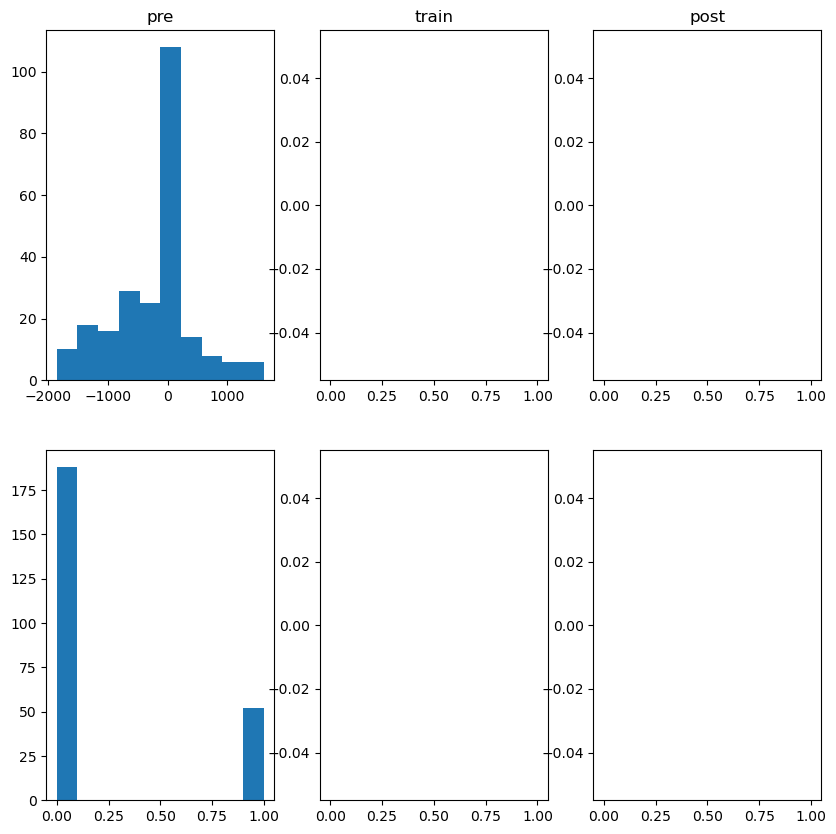

In [ ]:
plt.figure(figsize = (10, 10))
plt.subplot(231)
plt.title("pre")
plt.hist(burst_list_pre_directions)
plt.subplot(232)
plt.title("train")
plt.hist(burst_list_train_directions)
plt.subplot(233)
plt.title("post")
plt.hist(burst_list_post_directions)

plt.subplot(234)
plt.hist((burst_list_pre_directions > 0).astype(int))
plt.subplot(235)
plt.hist((burst_list_train_directions > 0).astype(int))
plt.subplot(236)
plt.hist((burst_list_post_directions > 0).astype(int))

/tmp/ipykernel_2248160/2814851611.py:3: RuntimeWarning: invalid value encountered in scalar divide
  train_proportion = np.sum(train)/len(train)
/tmp/ipykernel_2248160/2814851611.py:4: RuntimeWarning: invalid value encountered in scalar divide
  post_proportion = np.sum(post)/len(post)


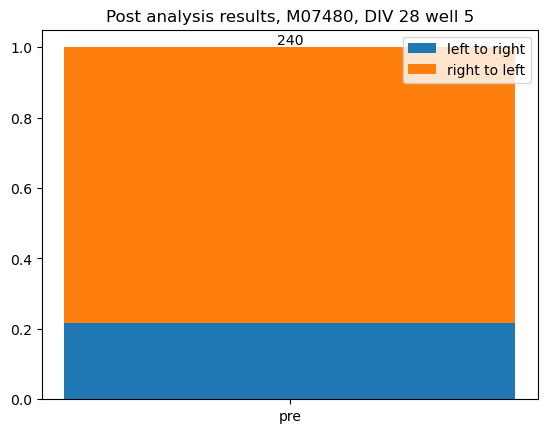

[0.21666667        nan        nan]


In [ ]:
pre = ((burst_list_pre_directions > 0).astype(int))
train = ((burst_list_train_directions > 0).astype(int))
post = ((burst_list_post_directions > 0).astype(int))
title = f"Post analysis results, {chip_id}, DIV {div} well {well_no}"
stacked_bar_plot(pre, train, post, title)